# **Ejercicio 2**

## **Librerias necesarias**

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
import warnings
warnings.filterwarnings('ignore')
import numpy as np


Nota: En este ejercicio se usará el mismo DataFrame del ejercicio anterior. Sin embargo, para efectos de práctica lo llamaremos nuevamente.

In [13]:
olimpicos_url = "https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv"
df_olimpicos = pd.read_csv(olimpicos_url) 
df_olimpicos.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## **Inciso 1**
**Crear un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible el patrón global de las características de height y weight de los ganadores de medallas de 2016 de los cinco deportes.**

Para solucionar este inciso el primer paso es filtrar el DataFrame para incluir únicamente las filas correspondientes a los ganadores de medallas de 2016 en los siguientes deportes `Athletics`, `Swimming`, `Rowing`, `Football`, `Hockey`.

In [14]:
deportes = ["Athletics", "Swimming", "Rowing", "Football", "Hockey"]
dep_2016 = df_olimpicos[(df_olimpicos['Year'] == 2016) & (df_olimpicos['Medal'].notna()) & 
                        (df_olimpicos['Sport'].isin(deportes))]
dep_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


Ahora, observando el conjunto de datos notamos una gran variedad de variables categóricas y numéricas. Para identificar algunos estadísticos de cada una de ellas es adecuado utilizar el método `.describe()`.

In [15]:
dep_2016.describe(include=object)

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,732,732,732,732,732,732,732,732,732,732
unique,648,2,54,54,1,1,1,5,99,3
top,"Michael Fred Phelps, II",M,United States,USA,2016 Summer,Summer,Rio de Janeiro,Athletics,Football Women's Football,Gold
freq,6,377,127,127,732,732,732,192,54,254


In [16]:
dep_2016.describe()

,ID,Age,Height,Weight,Year
count,732.000000,732.000000,729.000000,727.000000,732.0
mean,68648.244536,25.577869,180.023320,73.720770,2016.0
std,39361.251654,4.451373,10.076398,14.279014,0.0
min,62.000000,16.000000,150.000000,40.000000,2016.0
25%,32676.750000,22.000000,173.000000,64.000000,2016.0
50%,73187.000000,25.000000,180.000000,72.000000,2016.0
75%,103225.000000,29.000000,187.000000,82.000000,2016.0
max,135525.000000,40.000000,207.000000,136.000000,2016.0


Luego de haber utilizado `.describe` para ver la información más relevante del conjunto de datos, es posible afirmar que existen 5 variables numéricas y 10 variables categóricas. Entre las variables númericas encontramos la edad (`Age`), la altura (`Height`) y el peso (`Weight`) de cada atleta y el año , que en este caso es `2016`. También es posible ver el `ID`, esta última variable es diferente para cada atleta por lo tanto las estadísticas no van a representar una información útil. 
Ahora, en cuanto a las variables categóricas encontramos `Name`, `Sex`, `Team`, `NOC`, `Games`, `Season`, `City`, `Sport`, `Event` y `Medal`.

Al evaluar cuál es la visualización adecuada para que un patrón global represente las características de `Height` y `Weight`, encontramos el diagrama de dispersión, el cual es muy útil cuando se quiere ver que tanto se relaciona linealmente una variable con otra. En este caso tomamos el peso (`Weight`) como la variable independiente y la altura ( `Height`) como la variable dependiente. Es decir, veremos que tanto influye el peso en la altura de cada participante. Es posible tomar las variables en diferente orden, siendo la altura la variable independiente y el peso la variable dependiente. 

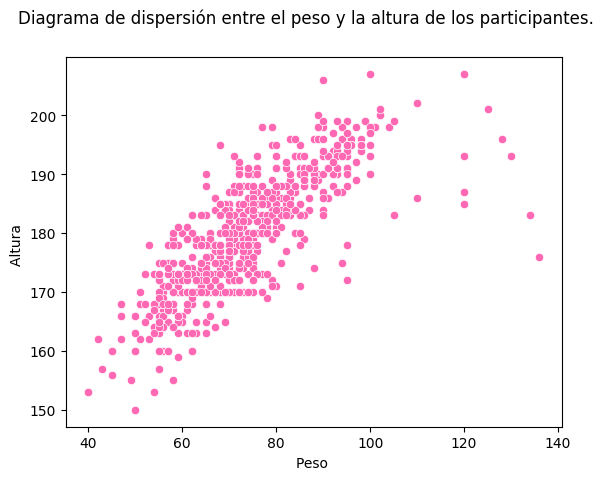

In [17]:
ax = sns.scatterplot(x="Weight", y="Height", data=dep_2016, color = '#FF69B4')
ax.set_xlabel('Peso ')  
ax.set_ylabel('Altura ')
ax.figure.suptitle('Diagrama de dispersión entre el peso y la altura de los participantes.')
plt.show()

Luego de haber graficado el diagrama de dispersión, es posible notar una relación directa y ligeramente fuerte entre ambas variables. Vemos que cada punto representado en el diagrama forman una linea que se dispersa hacia arriba, lo que permite indicar que a medida que el peso va aumentando, la altura tambien aumentará. También es posible notar que algunos datos no se encuentran tan cercanos a otros, los cuales podríamos considerar como atipícos, sin embargo, para darle validez a esa información se deben aplicar otro tipo de estadísticas. 


## **Inciso 2**
**Crear un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible la estadística de resumen para la altura y el peso de los jugadores que ganaron cada tipo de medalla (oro/plata/bronce) en los datos.**

Para resolver el inciso 2 , se realizarán dos diagramas de cajas y bigotes. Donde en cada uno se evaluará como influye el peso y la altura dependiendo de los diferentes tipos de medallas obtenidas por cada atleta en el año 2016. 

Primero, se realizó el conteo de las medallas para cada tipo (Oro, plata y bronce)

In [18]:
dep_medallas = (dep_2016.groupby(['Medal'])
                .size()  
                .reset_index(name ='Count').sort_values(by ='Count', ascending = False))  
dep_medallas

,Medal,Count
1,Gold,254
2,Silver,242
0,Bronze,236


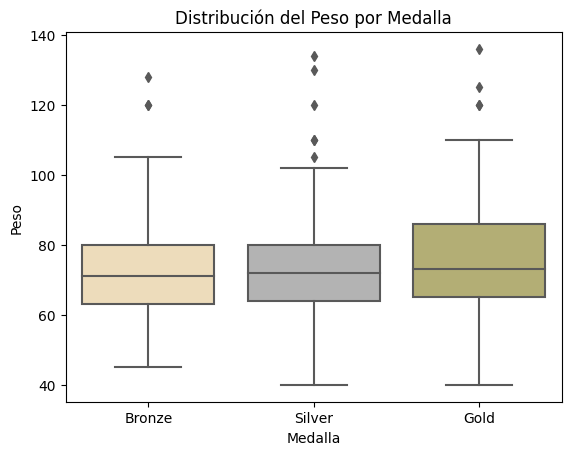

In [19]:
palet = [ '#F5DEB3', '#B3B3B3' , '#BDB76B']
sns.boxplot(x = 'Medal', y = 'Weight', data = dep_2016, palette = palet )
plt.title('Distribución del Peso por Medalla')
plt.xlabel('Medalla')
plt.ylabel('Peso')
plt.show()

El gráfico muestra la distribución del peso de los atletas según la medalla ganada (Bronce, Plata, Oro). La mediana del peso es ligeramente mayor para los ganadores de Oro y Plata en comparación con los de Bronce, pero todos tienen una distribución similar. Los bigotes indican el rango de los datos, excluyendo los valores atípicos, que son más altos en todos los grupos, reflejando algunos atletas con pesos significativamente diferentes del promedio.



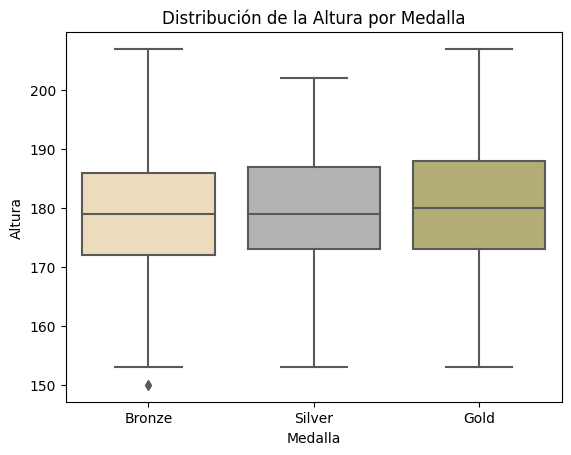

In [20]:
sns.boxplot(x = 'Medal', y = 'Height', data = dep_2016, palette = palet)
plt.title('Distribución de la Altura por Medalla')
plt.xlabel('Medalla')
plt.ylabel('Altura')
plt.show()

El gráfico muestra la distribución de la altura de los atletas según la medalla obtenida (Bronce, Plata, Oro). La mediana de la altura es similar en las tres categorías, con una ligera tendencia a ser mayor en los ganadores de Oro. Los bigotes indican que el rango de alturas es amplio en todos los grupos, desde aproximadamente 150 cm hasta 200 cm o más. Se observa un valor atípico en la categoría de Bronce, lo que indica un atleta significativamente más bajo que los demás. En general, las alturas de los atletas están distribuidas de manera similar entre los diferentes tipos de medallas.